## Business Problem Statement:

### The company is experiencing inconsistent sales performance and declining profitability across regions and product categories.

### Management does not clearly understand:

#### What is driving sales growth or decline?

#### Where profit is being lost despite sales?

#### Which products, regions, or customers are sustainable?

#### How future sales are likely to perform?


### IMPORTING LIBRARIES

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### DIAPLAY SETTINGS

In [71]:
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

### DATA LOADING AND EXCEPTION HANDLING

In [72]:
try:
    df = pd.read_csv(r"C:\Users\User\OneDrive\Documents\Project-1\Sample - Superstore.csv", encoding = 'latin1')
except FileNotFoundError:
    print('file not found')
except UnicodeDecodeError:
    print('encoding issue')
except pd.errors.EmptyDataError:
    print('empty data')

In [73]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


###  UNDERSTANDING DATA

In [74]:
print('-' * 40)
print(f'Shape of Data:{df.shape}')

print('-' * 40)
print(f'\nData Informations:\n{df.info()}')

print('-' * 40)
print(f'\nDuplicates Counts:\n{df.duplicated().sum()}')
print('-' * 40)

----------------------------------------
Shape of Data:(9994, 21)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   ob

### DATA VALIDATION & CLEANING

In [75]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [76]:
df[['Ship Date','Order Date']].dtypes

Ship Date     datetime64[ns]
Order Date    datetime64[ns]
dtype: object

### LOGIACL VALUE CHECKS

In [77]:
df[['Sales', 'Quantity', 'Discount', 'Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [78]:
# Invalid Sales Check

invalid_sales =(df['Sales'] < 0).sum()

print(f'Sales Count < 0 Count: {invalid_sales}')


Sales Count < 0 Count: 0


In [79]:
# Invalid Discounts Check

invalid_discounts = ((df['Discount'] < 0) | (df['Discount'] > 1)).sum()

print(f'Discount % < 0 & > 1 : {invalid_discounts}')

Discount % < 0 & > 1 : 0


In [80]:
# Invalid Quantity Check

invalid_quantity = (df['Quantity'] <= 0).sum()

print(f'Quantity < 0 Count : {invalid_quantity}')

Quantity < 0 Count : 0


### TIME SANITY

In [81]:
# Order date range

df['Order Date'].min(), df['Order Date'].max()


(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [82]:
 # chicking Ship date after order date

invalid_shipping_date = (df['Ship Date'] < df['Order Date']).sum()

print(f'Invalid Shipping Date : {invalid_shipping_date}')

Invalid Shipping Date : 0


In [83]:
total_rows = len(df)

print('_' * 30)
print(f"Invalid Sales %: {invalid_sales / total_rows:.2%}")
print('_' * 30)

print(f"Invalid Discount %: {invalid_discounts / total_rows:.2%}")
print('_' * 30)

print(f"Invalid Quantity %: {invalid_quantity / total_rows:.2%}")
print('_' * 30)

print(f"Invalid Shipping Date %: {invalid_shipping_date / total_rows:.2%}")
print('_' * 30)



______________________________
Invalid Sales %: 0.00%
______________________________
Invalid Discount %: 0.00%
______________________________
Invalid Quantity %: 0.00%
______________________________
Invalid Shipping Date %: 0.00%
______________________________


### CORRELATION CHECK

In [84]:
df[['Sales', 'Profit', 'Discount']].corr(method='spearman')


,Sales,Profit,Discount
Sales,1.000000,0.518407,-0.056969
Profit,0.518407,1.000000,-0.543350
Discount,-0.056969,-0.543350,1.000000


### CORRELATION INSIGHTS

##### - Sales and profit show a moderate positive relationship, indicating growth exists but is not fully margin-efficient.

##### - Discounting has almost no relationship with sales, suggesting discounts do not significantly drive volume.

##### - Discounts show a strong negative relationship with profit, confirming margin erosion as discounts increase.

In [85]:
#df = df.rename(
 #   'Row'


### FEATURE ENGINEERING

In [86]:
# Order Year

df['Order_Year'] = df['Order Date'].dt.year


In [87]:
# Order Month

df['Order_Month'] = df['Order Date'].dt.month


In [88]:
# Profit Margin

df['Profit_Margin'] = df['Profit'] / df['Sales'].replace(0, np.nan)


In [89]:
df[['Order_Year', 'Order_Month', 'Profit_Margin']].describe()

,Order_Year,Order_Month,Profit_Margin
count,9994.000000,9994.000000,9994.000000
mean,2015.722233,7.809686,0.120314
std,1.123555,3.284654,0.466754
min,2014.000000,1.000000,-2.750000
25%,2015.000000,5.000000,0.075000
50%,2016.000000,9.000000,0.270000
75%,2017.000000,11.000000,0.362500
max,2017.000000,12.000000,0.500000


In [90]:
df['Profit_Margin'].isna().sum()

np.int64(0)

### EXPLORATORY DATA ANALYSIS

#### Time-based Performance Analysis

In [91]:
# Monthly KPI table

monthly_summary = (df.groupby(df['Order Date'].dt.to_period('M'))
                   .agg(
                       Revenue = ('Sales', 'sum'),
                       Profit = ('Profit', 'sum'),
                       Avg_Profit_Margin = ('Profit_Margin', 'mean'),
                       Quantity_Sold = ('Quantity', 'sum')
                   )
                   .reset_index()
)

monthly_summary['Order Date'] = monthly_summary['Order Date'].dt.to_timestamp()
monthly_summary.head()

,Order Date,Revenue,Profit,Avg_Profit_Margin,Quantity_Sold
0,2014-01-01,14236.895,2450.1907,0.128582,284
1,2014-02-01,4519.892,862.3084,0.051812,159
2,2014-03-01,55691.009,498.7299,0.131002,585
3,2014-04-01,28295.345,3488.8352,0.228904,536
4,2014-05-01,23648.287,2738.7096,0.120751,466


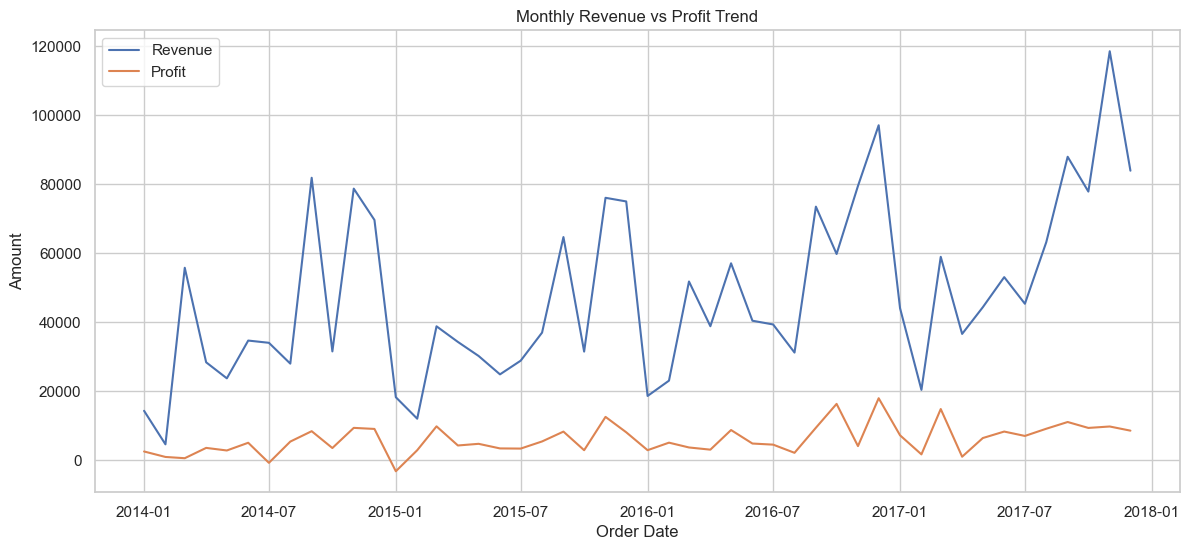

In [92]:
plt.figure(figsize=(14,6))

plt.plot(monthly_summary['Order Date'], monthly_summary['Revenue'], label='Revenue')
plt.plot(monthly_summary['Order Date'], monthly_summary['Profit'], label='Profit')

plt.title('Monthly Revenue vs Profit Trend')
plt.xlabel('Order Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)

plt.show()

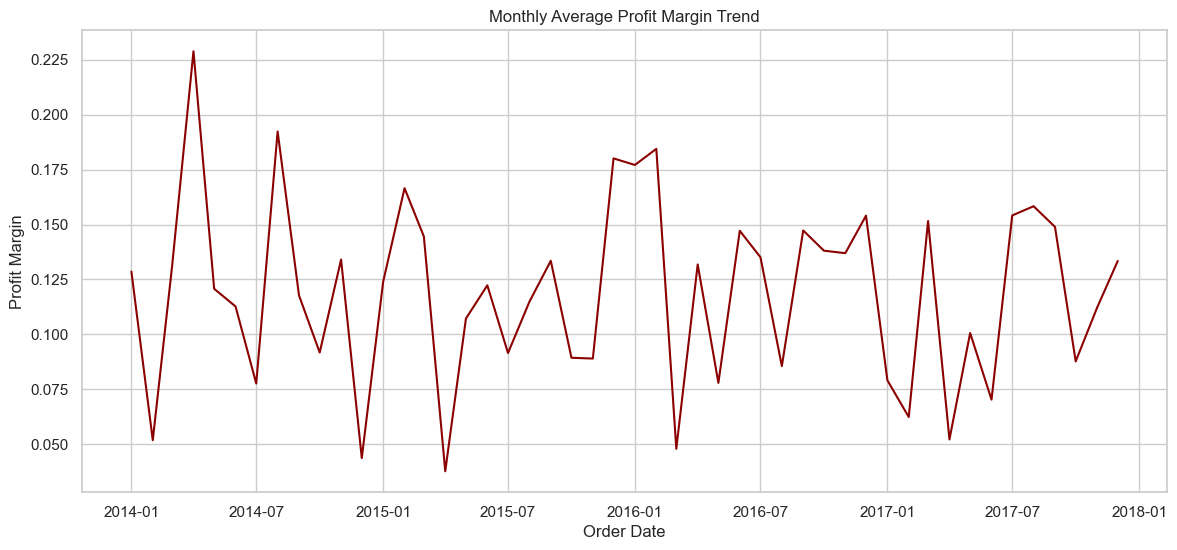

In [93]:
plt.figure(figsize=(14,6))

plt.plot(
    monthly_summary['Order Date'],
    monthly_summary['Avg_Profit_Margin'],
    color='darkred'
)

plt.title('Monthly Average Profit Margin Trend')
plt.xlabel('Order Date')
plt.ylabel('Profit Margin')
plt.grid(True)

plt.show()


#### Time-Based Performance Insights

##### - Monthly revenue exhibits significant volatility, indicating unstable demand patterns.

##### - Profit does not scale proportionally with revenue, highlighting margin inefficiencies during high-sales periods.

##### - Average profit margin fluctuates widely over time with no sustained upward trend, suggesting inconsistent pricing or cost control.

##### - Overall, business growth appears volume-driven rather than profitability-driven, raising concerns about long-term sustainability.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Category performance Analysis

In [94]:
# Aggregated KPIs by Category

category_summary = (
    df.groupby('Category')
      .agg(
          Sales=('Sales', 'sum'),
          Profit=('Profit', 'sum'),
          Avg_Profit_Margin=('Profit_Margin', 'mean'),
          Quantity_Sold=('Quantity', 'sum')
      )
      .reset_index()
)

category_summary


,Category,Sales,Profit,Avg_Profit_Margin,Quantity_Sold
0,Furniture,741999.7953,18451.2728,0.038784,8028
1,Office Supplies,719047.0320,122490.8008,0.138030,22906
2,Technology,836154.0330,145454.9481,0.156138,6939


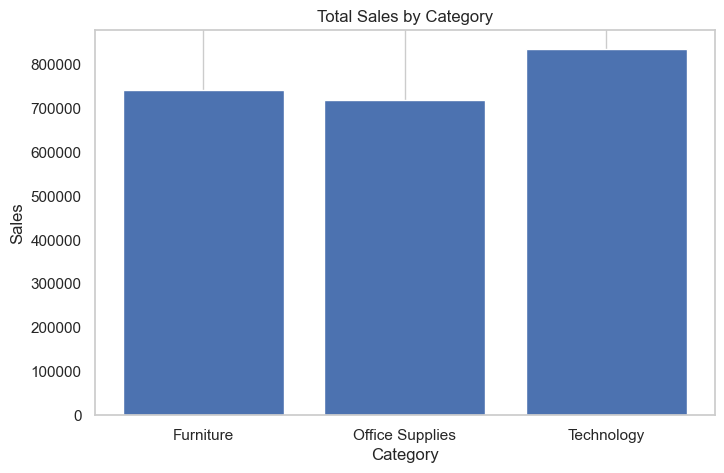

In [95]:
# Sales by Category

plt.figure(figsize=(8,5))

plt.bar(category_summary['Category'], category_summary['Sales'])
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.grid(axis='y')
plt.show()

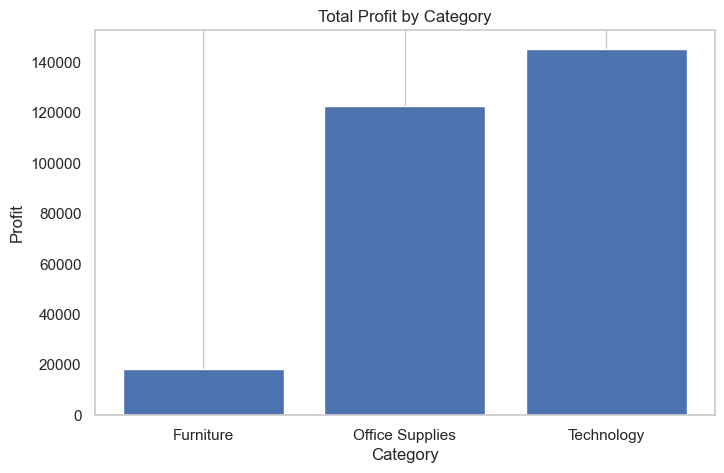

In [96]:
# Profit by Category

plt.figure(figsize=(8,5))

plt.bar(category_summary['Category'], category_summary['Profit'])
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.grid(axis='y')
plt.show()


#### Category-Level Insights

##### - Technology is the strongest performing category, delivering the highest sales, profit, and profit margin.

##### - Office Supplies generates stable profit through high sales volume but operates with moderate margins.

##### - Furniture exhibits significant margin compression, generating high sales but minimal profit, making it a key profitability risk.

##### - Overall profitability is uneven across categories, with profits concentrated in Technology and Office Supplies.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [97]:
# Sub-Category Profit Table

subcat_summary = df.groupby(['Category', 'Sub-Category']).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Profit_Margin': 'mean',
    'Quantity': 'sum'
}).reset_index()

subcat_summary.sort_values(by='Profit').head(10)


,Category,Sub-Category,Sales,Profit,Profit_Margin,Quantity
3,Furniture,Tables,206965.5320,-17725.4811,-0.147727,1241
0,Furniture,Bookcases,114879.9963,-3472.5560,-0.126640,868
12,Office Supplies,Supplies,46673.5380,-1189.0995,0.112039,647
8,Office Supplies,Fasteners,3024.2800,949.5182,0.299171,914
15,Technology,Machines,189238.6310,3384.7569,-0.072026,440
9,Office Supplies,Labels,12486.3120,5546.2540,0.429663,1400
5,Office Supplies,Art,27118.7920,6527.7870,0.251646,3000
7,Office Supplies,Envelopes,16476.4020,6964.1767,0.423140,906
2,Furniture,Furnishings,91705.1640,13059.1436,0.137066,3563
4,Office Supplies,Appliances,107532.1610,18138.0054,-0.156869,1729


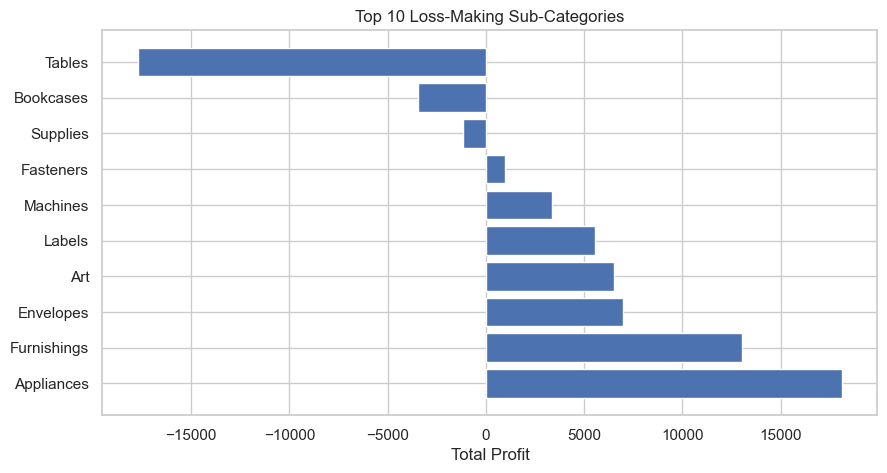

In [98]:
# Top 10 Loss-Making Sub-Categories

loss_subcats = subcat_summary.sort_values('Profit').head(10)

plt.figure(figsize=(10,5))
plt.barh(
    loss_subcats['Sub-Category'],
    loss_subcats['Profit']
)
plt.xlabel('Total Profit')
plt.title('Top 10 Loss-Making Sub-Categories')
plt.gca().invert_yaxis()
plt.show()


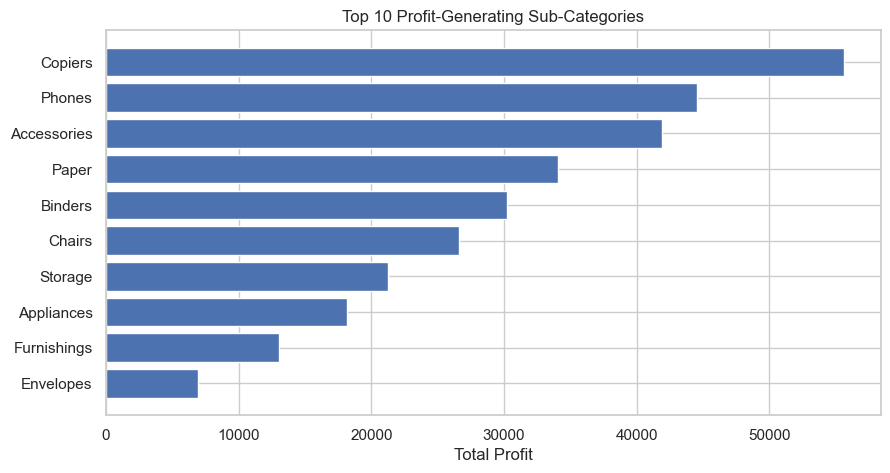

In [99]:
# Top 10 Profit-Making Sub-Categories

profit_subcats = subcat_summary.sort_values('Profit', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(
    profit_subcats['Sub-Category'],
    profit_subcats['Profit']
)
plt.xlabel('Total Profit')
plt.title('Top 10 Profit-Generating Sub-Categories')
plt.gca().invert_yaxis()
plt.show()


#### Sub-Category-Level Insights
##### - Tables and Bookcases (Furniture) are the largest loss-making sub-categories, generating high sales but consistently negative profit margins.
##### - Machines (Technology) show strong revenue but poor profitability, indicating high costs or aggressive discounting.
##### - Copiers, Phones, and Accessories (Technology) are the primary profit drivers with high margins and stable demand.
##### - Consumables such as Paper, Binders, and Envelopes (Office Supplies) deliver consistent profits despite moderate sales.
##### - Overall profitability is driven by a small number of high-margin sub-categories, while losses are concentrated in bulky furniture and hardware items.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Discount Performance

In [100]:
df['Discount'].describe()

count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

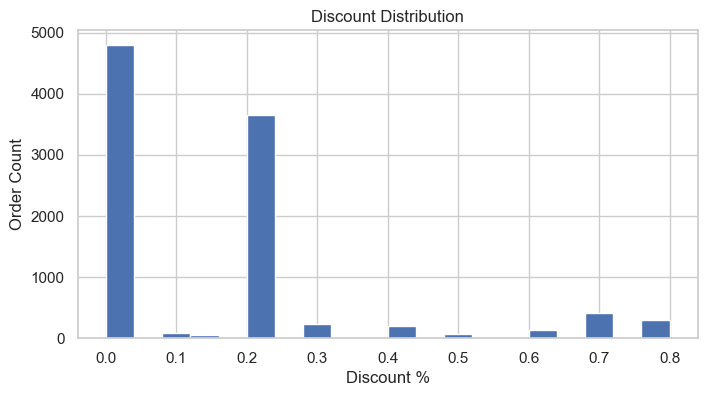

In [101]:
# Discount Distribution

plt.figure(figsize=(8,4))

plt.hist(df['Discount'], bins=20)
plt.title('Discount Distribution')
plt.xlabel('Discount %')
plt.ylabel('Order Count')
plt.show()

In [102]:
df = df.reset_index(drop=True)

In [103]:
# Discount Bucketing

def discount_flag(discount):
    if pd.isna(discount):
        return 'Unknown'
    if discount < 0:
        return 'Invalid'
    if discount < 0.001:
        return 'No Discount'
    elif discount <= 0.20:
        return 'Low Discount'
    elif discount <= 0.50:
        return 'Medium Discount'
    else:
        return 'High Discount'

df['Discount_Flag'] = df['Discount'].apply(discount_flag)


In [104]:
df['Discount_Flag'].dtype

dtype('O')

In [105]:
df[['Discount','Discount_Flag']].sample(10)

,Discount,Discount_Flag
8110,0.3,Medium Discount
2703,0.0,No Discount
2619,0.2,Low Discount
9374,0.0,No Discount
1424,0.2,Low Discount
7874,0.0,No Discount
2969,0.2,Low Discount
8330,0.0,No Discount
5493,0.0,No Discount
2613,0.2,Low Discount


In [106]:
# Sales vs Profit by Discount Level

discount_Summary = (
    df.groupby('Discount_Flag')
      .agg(
          Sales=('Sales', 'sum'),
          Profit=('Profit', 'sum'),
          Avg_Profit_Margin=('Profit_Margin', 'mean'),
          Quantity=('Quantity', 'sum')
      )
      .reset_index()
)

discount_Summary


,Discount_Flag,Sales,Profit,Avg_Profit_Margin,Quantity
0,High Discount,6.422874e+04,-76559.0513,-1.138785,3349
1,Low Discount,8.465222e+05,100785.4745,0.174368,14231
2,Medium Discount,2.985414e+05,-58817.0047,-0.219727,2026
3,No Discount,1.087908e+06,320987.6032,0.340160,18267


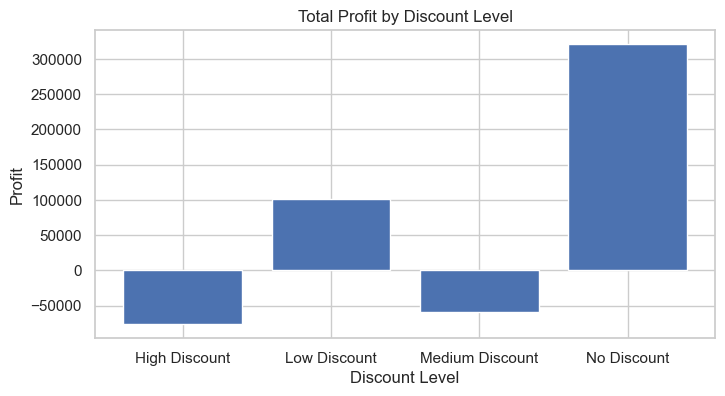

In [107]:
# Profit by Discount Level

plt.figure(figsize=(8,4))

plt.bar(discount_Summary['Discount_Flag'], discount_Summary['Profit'])
plt.title('Total Profit by Discount Level')
plt.xlabel('Discount Level')
plt.ylabel('Profit')
plt.show()

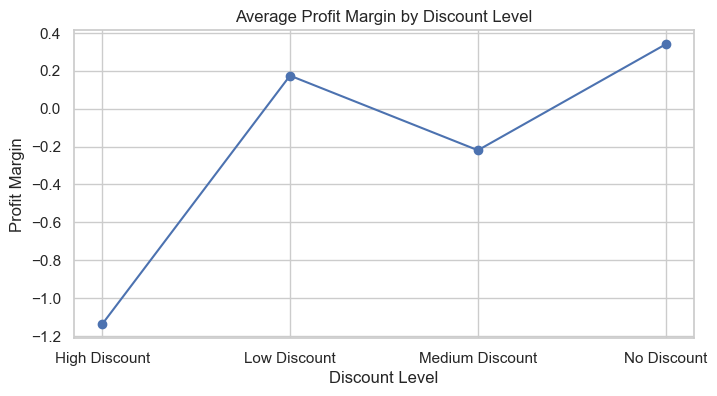

In [108]:
# Avg Margin by Discount Level

plt.figure(figsize=(8,4))

plt.plot(discount_Summary['Discount_Flag'], discount_Summary['Avg_Profit_Margin'], marker='o')
plt.title('Average Profit Margin by Discount Level')
plt.xlabel('Discount Level')
plt.ylabel('Profit Margin')
plt.show()


#### Discount Behavior insights 

##### - No-discount sales drive most of the profit with the highest margins (~34%).

##### - Low discounts remain profitable, showing controlled discounting works.

##### - Medium and high discounts generate losses, despite contributing to sales volume.

##### - Higher discounts increase volume but destroy margin, creating a volume–profit mismatch.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Region EDA analysis

In [109]:
region_summary = (
    df.groupby('Region')
      .agg(
          Sales=('Sales', 'sum'),
          Profit=('Profit', 'sum'),
          Avg_Profit_Margin=('Profit_Margin', 'mean'),
          Quantity=('Quantity', 'sum')
      )
      .reset_index()
)

region_summary


,Region,Sales,Profit,Avg_Profit_Margin,Quantity
0,Central,501239.8908,39706.3625,-0.104073,8780
1,East,678781.2400,91522.7800,0.167227,10618
2,South,391721.9050,46749.4303,0.163519,6209
3,West,725457.8245,108418.4489,0.219487,12266


In [110]:
region_profit_share = region_summary.copy()

region_profit_share['Profit_Share_%'] = (
    region_profit_share['Profit'] / region_profit_share['Profit'].sum() * 100
)

region_profit_share


,Region,Sales,Profit,Avg_Profit_Margin,Quantity,Profit_Share_%
0,Central,501239.8908,39706.3625,-0.104073,8780,13.864098
1,East,678781.2400,91522.7800,0.167227,10618,31.956610
2,South,391721.9050,46749.4303,0.163519,6209,16.323295
3,West,725457.8245,108418.4489,0.219487,12266,37.855997


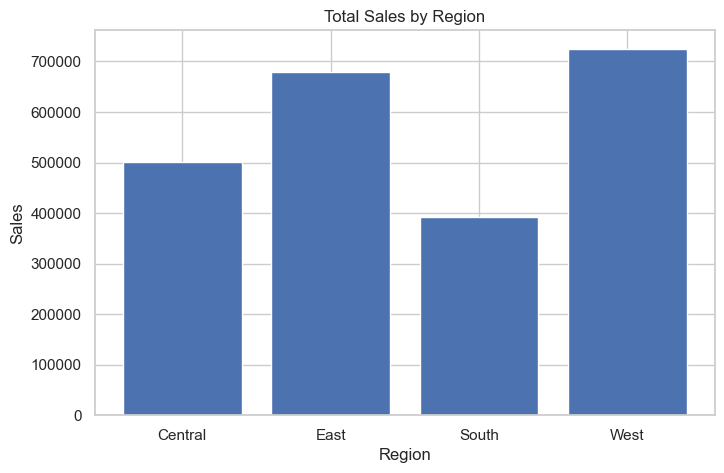

In [111]:
# Sales by Region

plt.figure(figsize=(8,5))

plt.bar(region_summary['Region'], region_summary['Sales'])
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

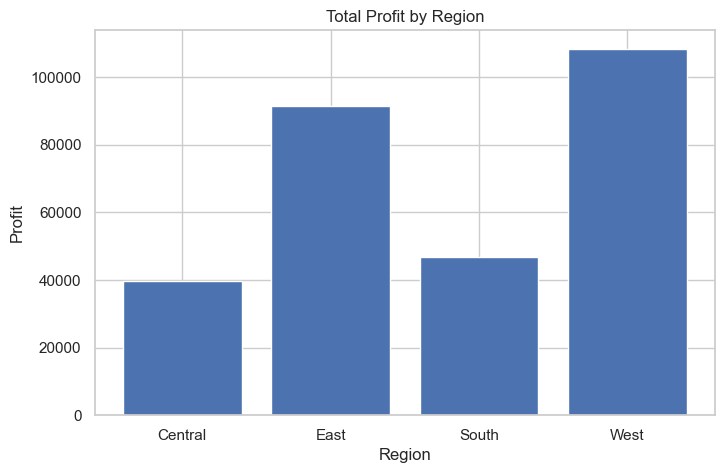

In [112]:
# Profit by Region

plt.figure(figsize=(8,5))

plt.bar(region_summary['Region'], region_summary['Profit'])
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

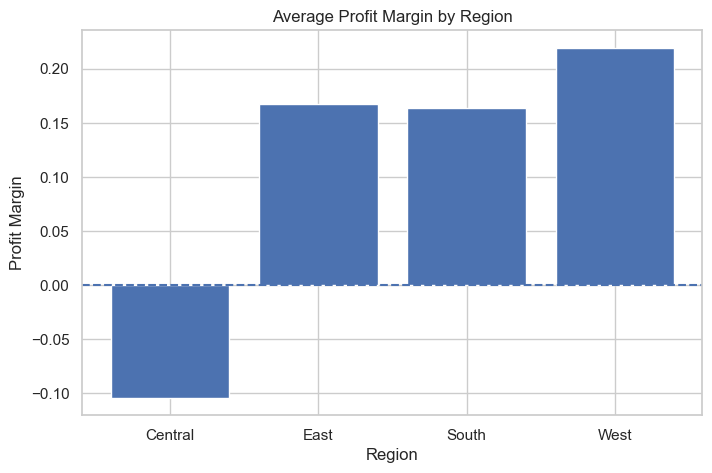

In [113]:
# Average Profit Margin by Region

plt.figure(figsize=(8,5))

plt.bar(region_summary['Region'], region_summary['Avg_Profit_Margin'])
plt.title('Average Profit Margin by Region')
plt.xlabel('Region')
plt.ylabel('Profit Margin')
plt.axhline(0, linestyle='--')  # break-even reference
plt.show()


#### Regional Performance Insights

##### - West region is the strongest performer, generating the highest sales and the largest share of total profit (~38%) with the best margins.

##### - East region is the second-largest profit contributor, showing healthy margins and stable performance.

##### - South region is moderately profitable, but contributes significantly less profit compared to West and East.

##### - Central region shows negative average profit margin, indicating profitability issues despite reasonable sales volume.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Region × Discount analysis

In [114]:
# Aggregate KPIs by Region × Discount_Flag

region_discount_Summary = (
    df.groupby(['Region', 'Discount_Flag'])
      .agg(
          Sales=('Sales', 'sum'),
          Profit=('Profit', 'sum'),
          Avg_Profit_Margin=('Profit_Margin', 'mean'),
          Quantity=('Quantity', 'sum')
      )
      .reset_index()
)

region_discount_Summary


,Region,Discount_Flag,Sales,Profit,Avg_Profit_Margin,Quantity
0,Central,High Discount,23608.4560,-36483.6944,-1.467123,1689
1,Central,Low Discount,128955.1520,15973.1962,0.178573,3168
2,Central,Medium Discount,105525.6428,-15908.5800,-0.168224,772
3,Central,No Discount,243150.6400,76125.4407,0.342005,3151
4,East,High Discount,19295.1000,-19961.8334,-0.774373,682
5,East,Low Discount,191168.3030,28233.8412,0.191791,3503
6,East,Medium Discount,126575.2970,-22126.7742,-0.214670,1026
7,East,No Discount,341742.5400,105377.5464,0.344672,5407
8,South,High Discount,11400.8610,-8404.4739,-0.742677,543
9,South,Low Discount,105021.7520,8648.5743,0.160384,2340


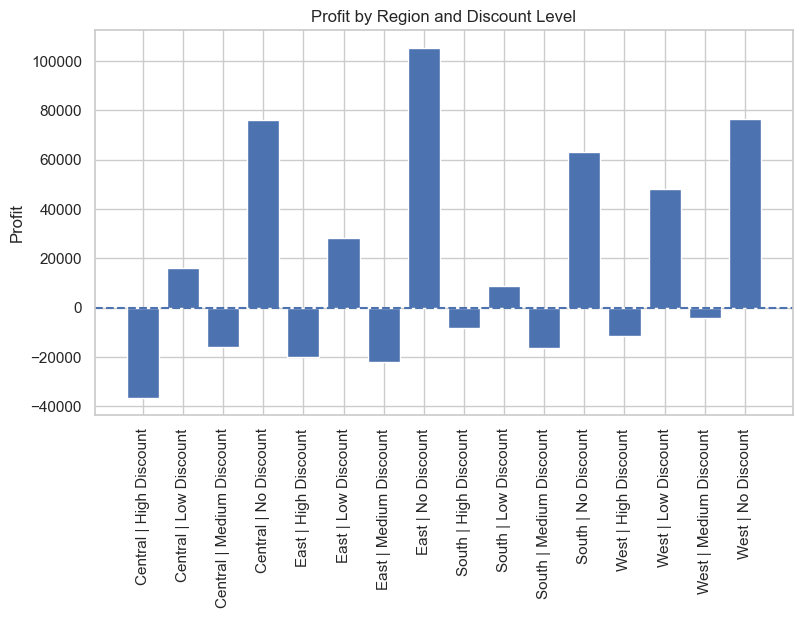

In [115]:
# Profit by Region and Discount Level

plt.figure(figsize=(9,5))
plt.bar(
    region_discount_Summary['Region'] + " | " + region_discount_Summary['Discount_Flag'],
    region_discount_Summary['Profit']
)
plt.xticks(rotation=90)
plt.axhline(0, linestyle='--')
plt.title('Profit by Region and Discount Level')
plt.ylabel('Profit')
plt.show()


In [116]:
# Region & Discount Pivot Table summary

region_discount_pivot = region_discount_Summary.pivot(
    index='Region',
    columns='Discount_Flag',
    values='Profit'
)

region_discount_pivot


Discount_Flag,High Discount,Low Discount,Medium Discount,No Discount
Region,,,,
Central,-36483.6944,15973.1962,-15908.5800,76125.4407
East,-19961.8334,28233.8412,-22126.7742,105377.5464
South,-8404.4739,8648.5743,-16476.0079,62981.3378
West,-11709.0496,47929.8628,-4305.6426,76503.2783


#### Region × Discount Analysis Observations

##### - High and medium discounts lead to losses across most regions, indicating that aggressive discounting is structurally unprofitable.

##### - Central region is the most affected by discounting, showing losses even at moderate discount levels.

##### - West and East regions remain profitable under no or low discounting, highlighting better pricing discipline.

##### - Sales volume under high discounts does not translate into profit, confirming a volume–margin trade-off at the regional level.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Perparing For H2O.Ai AutoML Sales Predctive Model

In [117]:
# Prepare monthly sales data for forecasting
# This dataset will be used to train an H2O AutoML regression model

forecast_df = monthly_summary[['Order Date', 'Revenue']].copy()

In [118]:
# Rename columns to match forecasting conventions
forecast_df.rename(columns={
    'Order Date': 'date',
    'Revenue': 'sales'
}, inplace=True)

In [119]:
# Extract month as a categorical feature to capture seasonality
forecast_df['order_month'] = forecast_df['date'].dt.month


In [120]:
# Sort data chronologically
forecast_df = forecast_df.sort_values('date')


In [121]:
# Validate structure and data types
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         48 non-null     datetime64[ns]
 1   sales        48 non-null     float64       
 2   order_month  48 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 1.1 KB


In [122]:
forecast_df.head()


,date,sales,order_month
0,2014-01-01,14236.895,1
1,2014-02-01,4519.892,2
2,2014-03-01,55691.009,3
3,2014-04-01,28295.345,4
4,2014-05-01,23648.287,5


In [123]:
forecast_df.tail()


,date,sales,order_month
43,2017-08-01,63120.8880,8
44,2017-09-01,87866.6520,9
45,2017-10-01,77776.9232,10
46,2017-11-01,118447.8250,11
47,2017-12-01,83829.3188,12


In [124]:
# Export dataset for H2O AutoML modeling
forecast_df.to_csv('monthly_sales_for_h2o.csv', index=False)

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### FINAL INSIGHTS — Sales Performance & Forecasting Analysis

##### 1. Revenue growth does not consistently translate into profit growth
##### - While sales show periodic spikes over time, profit and profit margins fluctuate significantly, indicating margin pressure during high-sales periods.

##### 2️. Profitability is concentrated, not evenly distributed
##### - A small number of categories and sub-categories (primarily Technology products) drive the majority of profits, while losses are concentrated in specific Furniture and hardware-related sub-categories.

##### 3️. Discounting is the primary driver of margin erosion
##### - Medium and high discount levels consistently generate losses, while no-discount and low-discount sales account for most of the total profit, confirming a volume–margin trade-off.

##### 4️. Regional performance varies in efficiency, not just scale
##### - West and East regions contribute sustainable profits with healthy margins, whereas the Central region shows high sales volume but weak or negative profitability.

##### 5️. Seasonality plays a measurable role in sales performance
##### - Monthly sales exhibit recurring seasonal patterns, justifying the inclusion of month-based features in forecasting models.

##### 6️. Short-term sales forecasts indicate stable demand with seasonal fluctuations
##### - AI-augmented forecasting suggests near-term sales will follow historical seasonal trends, supporting short-term planning rather than aggressive growth assumptions.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### BUSINESS RECOMMENDATIONS

##### 1. Reduce aggressive discounting beyond 20%
##### - Medium and high discounts consistently erode margins without delivering proportional sales growth. Pricing policies should cap discounts and require justification for exceptions.

##### 2. Protect and scale high-margin Technology sub-categories
##### - Products such as Phones, Copiers, and Accessories drive a disproportionate share of profit. Focus inventory availability, marketing, and pricing discipline on these segments.

##### 3. Re-evaluate Furniture pricing and cost structure
##### - Loss-making sub-categories like Tables and Bookcases require review of supplier costs, logistics expenses, and discount practices to restore profitability or rationalize offerings.

##### 4. Adopt region-specific pricing strategies
##### - Central region shows weak profitability despite strong sales. Introduce tighter discount controls and cost optimization initiatives in underperforming regions while scaling proven strategies in West and East.

##### 5. Use seasonality-aware forecasts for short-term planning
##### - Leverage monthly sales forecasts to plan inventory, staffing, and promotions, avoiding aggressive expansion assumptions unsupported by demand patterns.

##### 6. Shift focus from volume-driven to margin-led growth
##### - Decision-making should prioritize profit margin and contribution rather than topline sales alone to ensure sustainable business performance.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [125]:
# Exporting Data for Storytellig

df.to_csv("AI-Augmented Sales Forecasting Dashboard.csv", index=False)